In [1]:
from src.classes import (
    BallAnomaly,
    Ender5Stat,
    HitBox,
    MeasurementInformation,
    TankProperties32x2,
)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from src.util import plot_3D_traj

In [35]:
def plot_ball_path(tank, ball, traj, steps):
    
    theta = np.linspace(0, 2 * np.pi, 100)
    z_tank = np.linspace(tank.T_bz[0], tank.T_bz[1], 100)
    X_tank, Z_tank = np.meshgrid(tank.T_r * np.cos(theta), z_tank)
    Y_tank, _ = np.meshgrid(tank.T_r * np.sin(theta), z_tank)
    
    match traj:
        case "helix":
            helix_turns = 2
            t = np.linspace(0, 2 * np.pi * helix_turns, steps)
            x_traj = tank.T_r * 0.5 * np.cos(t)  
            y_traj = tank.T_r * 0.5 * np.sin(t) 
            z_traj = np.linspace(tank.T_bz[0], tank.T_bz[1], steps)
        case "ellipse":
            a = tank.T_r * 0.5  
            b = tank.T_r * 0.4 
            t = np.linspace(0, 2 * np.pi, steps)
            x_traj = a * np.cos(t) 
            y_traj = b * np.sin(t)  
            z_traj = np.linspace(tank.T_bz[0], tank.T_bz[1], steps)
    
    trajectory_coordinates = []
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    
    ax.plot_surface(X_tank, Y_tank, Z_tank, alpha=0.5, color="lightgray", edgecolor='none')

    
    ax.plot(x_traj, y_traj, z_traj, color="red")
    
    for i in range(steps):
        trajectory_coordinates.append((x_traj[i], y_traj[i], z_traj[i]))
        n = 10
        x_ball = ball.d / 2 * np.outer(np.cos(np.linspace(0, 2 * np.pi, n)), np.sin(np.linspace(0, np.pi, n))) + x_traj[i]
        y_ball = ball.d / 2 * np.outer(np.sin(np.linspace(0, 2 * np.pi, n)), np.sin(np.linspace(0, np.pi, n))) + y_traj[i]
        z_ball = ball.d / 2 * np.outer(np.ones(n), np.cos(np.linspace(0, np.pi, n))) + z_traj[i]

        
        ax.plot_surface(x_ball, y_ball, z_ball, alpha=0.6, color="lightblue", edgecolor='none')
  
    ax.set_xlim([-tank.T_r, tank.T_r])
    ax.set_ylim([-tank.T_r, tank.T_r])
    ax.set_zlim([tank.T_bz[0], tank.T_bz[1]])
    ax.set_xlabel("X [mm]")
    ax.set_ylabel("Y [mm]")
    ax.set_zlabel("Z [mm]")
    plt.show()

    return trajectory_coordinates


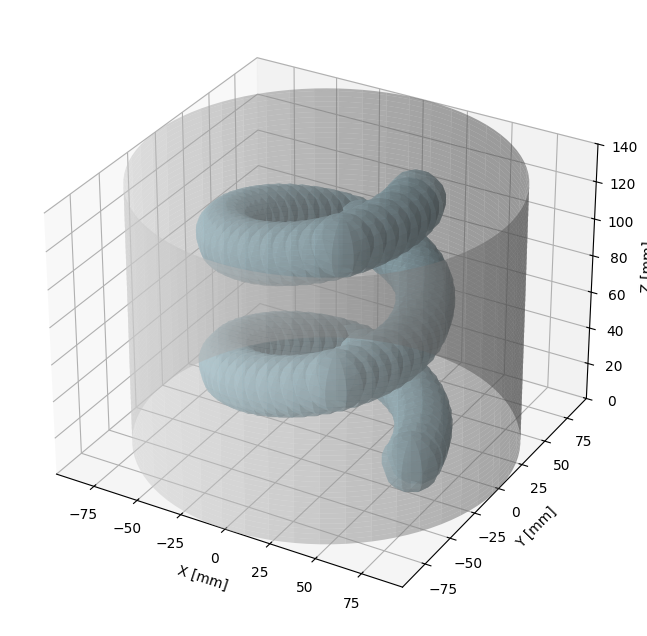

[(np.float64(48.5), np.float64(0.0), np.float64(0.0)),
 (np.float64(48.109808422293575),
  np.float64(6.1397339983268395),
  np.float64(1.4141414141414141)),
 (np.float64(46.94551201772328),
  np.float64(12.180677378282342),
  np.float64(2.8282828282828283)),
 (np.float64(45.02584475127952),
  np.float64(18.025629099525887),
  np.float64(4.242424242424242)),
 (np.float64(42.38169478788457),
  np.float64(23.580541700872732),
  np.float64(5.656565656565657)),
 (np.float64(39.05560749025634),
  np.float64(28.75603455915006),
  np.float64(7.070707070707071)),
 (np.float64(35.101100848095896),
  np.float64(33.468832056882434),
  np.float64(8.484848484848484)),
 (np.float64(30.581804353599342),
  np.float64(37.643103518150205),
  np.float64(9.8989898989899)),
 (np.float64(25.570435179109364),
  np.float64(41.21168335255145),
  np.float64(11.313131313131313)),
 (np.float64(20.147628130591492),
  np.float64(44.117151774694136),
  np.float64(12.727272727272727)),
 (np.float64(14.400638203421334

In [36]:

tank = TankProperties32x2()
ball = BallAnomaly(x=0, y=20, z=0, d=30, perm=100, material=None)

a = 50 
b = 40  
plot_ball_path(tank, ball, "helix", 100)

#viel mehr Rotation/Windungen (können sich auch überlappen, pro Rotation nur 1 cm Höhe gewinnen)

#2 Datensätze pro Muster 
#8, Kreis, Spirale und dann 3D 